## Importing the libraries and data

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_csv("assets\housing.csv")

## Observing Data

In [50]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


Since MEDV is the variable to predict, we will delete it for now.

In [51]:
y = df['MEDV']
del df['MEDV']

In [52]:
df.describe()

,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


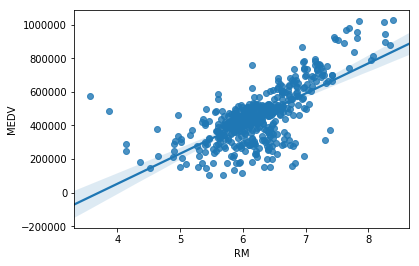

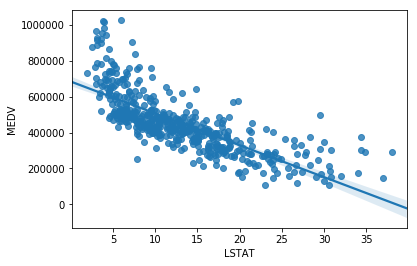

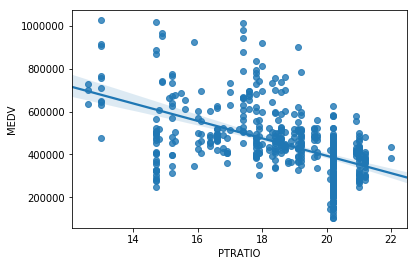

In [53]:
import seaborn as sns


for var in df.columns:
    sns.regplot(df[var],y)
    plt.show()

In [54]:
from sklearn.metrics import r2_score
def performance_metric(y_true,y_pred):
    score = r2_score(y_true,y_pred)
    return score


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection as curves
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=100)

D:\Softwares\Anaconda\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


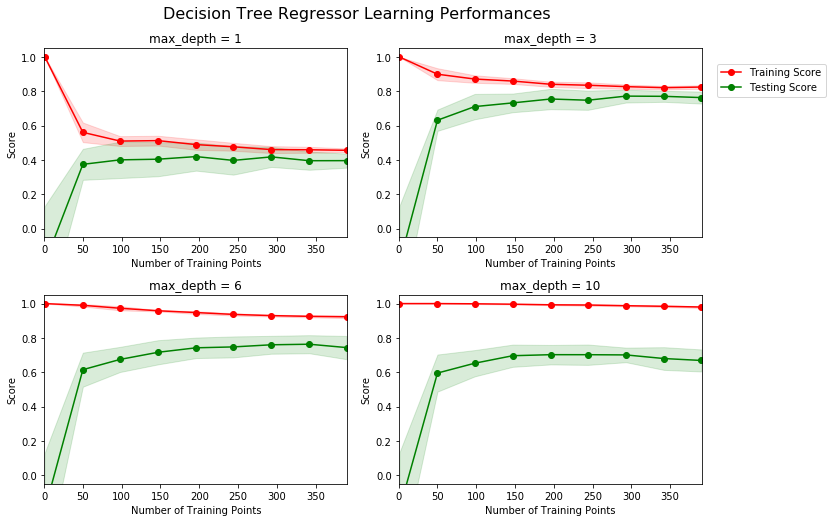

In [58]:
""" Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
# Create 10 cross-validation sets for training and testing
cv = ShuffleSplit( n_splits = 10, test_size = 0.2, random_state = 0)


# Generate the training set sizes increasing by 50
train_sizes = np.rint(np.linspace(1, df.shape[0]*0.8 - 1, 9)).astype(int)

# Create the figure window
fig = plt.figure(figsize=(10,7))

# Create three different models based on max_depth
for k, depth in enumerate([1,3,6,10]):
        
    # Create a Decision tree regressor at max_depth = depth
    regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
    sizes, train_scores, test_scores = curves.learning_curve(regressor, df, y, \
        cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Subplot the learning curve 
    ax = fig.add_subplot(2, 2, k+1)
    ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
    ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
    ax.fill_between(sizes, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    ax.fill_between(sizes, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
        
    # Labels
    ax.set_title('max_depth = %s'%(depth))
    ax.set_xlabel('Number of Training Points')
    ax.set_ylabel('Score')
    ax.set_xlim([0, df.shape[0]*0.8])
    ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
fig.tight_layout()
fig.show()